# 1) In driver_data.csvPreview the document, you are given a dataset of delivery fleet driver data. For each driver we have two features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit.

# Run the K-Means algorithm on this dataset and find the optimal number of clusters. What insights can you gather from these clusters?
#    Perform Agglomerative clustering on the same dataset with an appropriate number of clusters. Plot the dendrogram.
#    Compare the results from your K-Means model and your Hierarchical clustering model using silhouette scores. Which model is superior?

# Document your work and explain your reasoning.



## we will solve the it the following steps 
## 1)data engineering
## 2)model building
## 3)best model

# 1)data engineering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
import warnings


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('driver_data.csv')
df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null int64
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [4]:
df.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


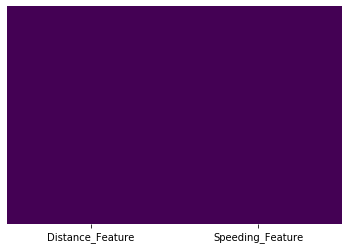

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

checking the distribution of the data, we can see that its not after applying cube root we make more distibuted than before.

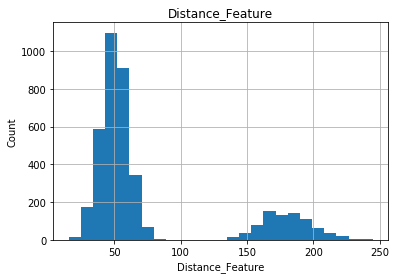

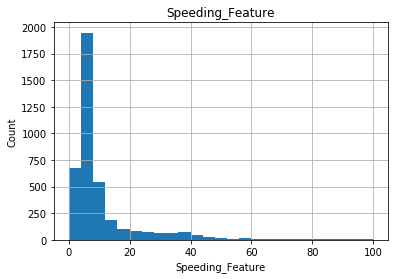

In [6]:
for feature in df.columns:
    
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

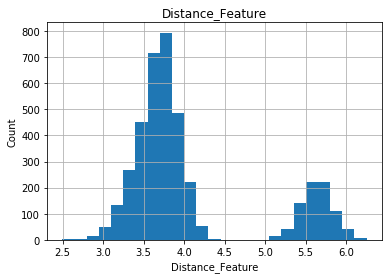

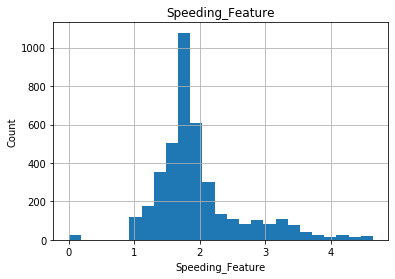

In [7]:
for feature in df.columns:
    data=df.copy()
    data[feature]=np.cbrt(data[feature])
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [8]:
df

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [9]:
data=np.cbrt(df)
data

,Distance_Feature,Speeding_Feature
0,4.145478,3.036589
1,3.745149,2.924018
2,4.011219,3.000000
3,3.818790,2.802039
4,3.793247,2.924018
...,...,...
3995,5.429288,2.154435
3996,5.605882,1.709976
3997,5.549525,2.289428
3998,5.605564,1.709976


applying the cubroot function on the dataset to make it normally distributed

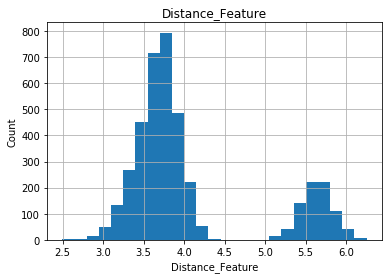

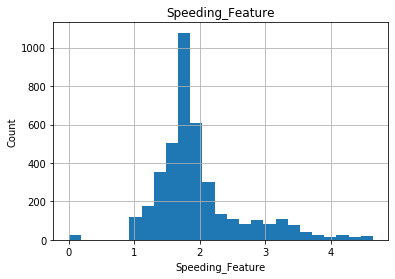

In [10]:
for feature in data.columns:
    
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# 2)model building
## 2.1) using kmeans clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

You do not use training and testing in unsupervised learning. There is no objective function in unsupervised learning to test the performance of the algorithm.

Checking the optimal number of cluster using elbow method, this method  makes a plot between wcss and clusters.
WCSS measures the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. This means that WCSS is often not directly comparable across clusters with different numbers of observations. Here, we to find our optimal cluster when there is very less difference in wcss. Here ,we find the optimal number is 2.

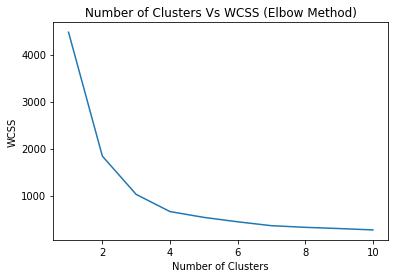

In [11]:
wcss = list()

# finding the best k i.e. number of clusters, Using elbow method
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
    y_kmeans = kmeans.fit_predict(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Number of Clusters Vs WCSS (Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
print(wcss)

[4474.6344654017175, 1840.7800880262494, 1026.1764638458567, 661.3889499945932, 538.0808772216593, 444.0770460252419, 361.3456469582939, 326.3391499325143, 300.3609488157149, 271.43162234303884]


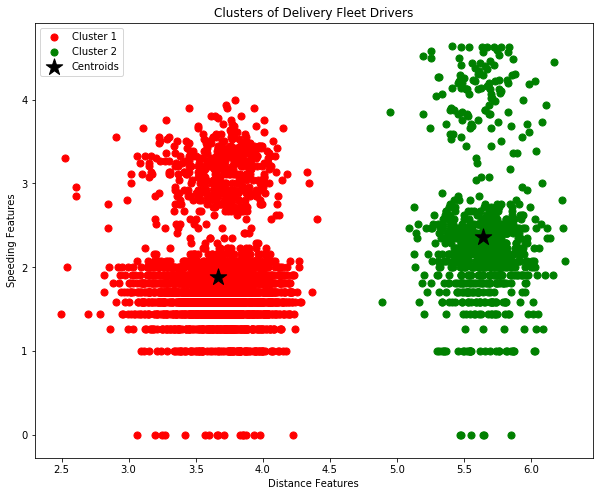

In [13]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(data)
plt.figure(figsize=(10,8))
plt.scatter(data[y_kmeans == 0]['Distance_Feature'], data[y_kmeans == 0]['Speeding_Feature'], s = 50, c = 'red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1]['Distance_Feature'], data[y_kmeans == 1]['Speeding_Feature'], s = 50, c = 'green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='*', s = 300, c = 'black', label='Centroids')
plt.title('Clusters of Delivery Fleet Drivers')
plt.xlabel('Distance Features')
plt.ylabel('Speeding Features')
plt.legend()
plt.show()

In [14]:
kmeans.cluster_centers_

array([[3.66753357, 1.88411844],
       [5.63926992, 2.36124862]])

In [15]:
kmeans.inertia_

1840.7800880262494

In [16]:
X_copy2 = df.copy()
X_copy2['Predicted Cluster'] = y_kmeans
X_copy2['Predicted Cluster'].value_counts()

0    3200
1     800
Name: Predicted Cluster, dtype: int64

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. The silhouette value is a measure of how similar an object is to its own cluster compared to other clustersm

In [17]:
silhouette_avg = silhouette_score(data,y_kmeans).round(3)
print("For n_clusters =",2,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.665


#####  It can be claimed that as inter-city and rural drivers, in Cluster 1 for example due to traffic jams and frequent stops the speed as well as the distance will be short, while in group Cluster 2 though the distance crossed is long speed is low and this can be justified in case of shipping trucks…etc.

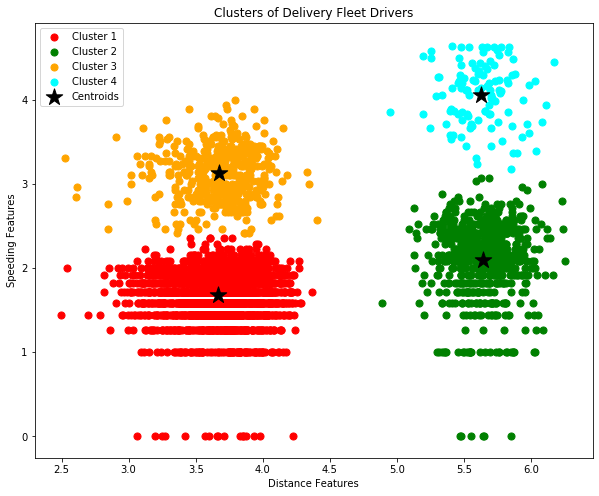

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(data)
plt.figure(figsize=(10,8))
plt.scatter(data[y_kmeans == 0]['Distance_Feature'], data[y_kmeans == 0]['Speeding_Feature'], s = 50, c = 'red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1]['Distance_Feature'], data[y_kmeans == 1]['Speeding_Feature'], s = 50, c = 'green', label='Cluster 2')
plt.scatter(data[y_kmeans == 2]['Distance_Feature'], data[y_kmeans == 2]['Speeding_Feature'], s = 50, c = 'orange', label='Cluster 3')
plt.scatter(data[y_kmeans == 3]['Distance_Feature'], data[y_kmeans == 3]['Speeding_Feature'], s = 50, c = 'cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='*', s = 300, c = 'Black', label='Centroids')

plt.title('Clusters of Delivery Fleet Drivers')
plt.xlabel('Distance Features')
plt.ylabel('Speeding Features')
plt.legend(loc='upper left')
plt.show()

In [19]:
kmeans.cluster_centers_

array([[3.66640365, 1.6797776 ],
       [5.64141957, 2.09081494],
       [3.67440307, 3.12643844],
       [5.6257858 , 4.0576054 ]])

In [20]:
kmeans.inertia_

661.3889499945932

In [21]:
X_copy2 = df.copy()
X_copy2['Predicted Cluster'] = y_kmeans
X_copy2['Predicted Cluster'].value_counts()

0    2748
1     690
2     452
3     110
Name: Predicted Cluster, dtype: int64

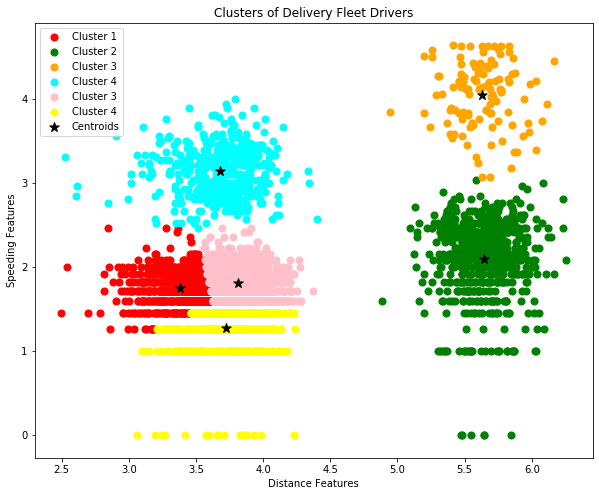

In [22]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(data)
plt.figure(figsize=(10,8))
plt.scatter(data[y_kmeans == 0]['Distance_Feature'], data[y_kmeans == 0]['Speeding_Feature'], s = 50, c = 'red', label='Cluster 1')
plt.scatter(data[y_kmeans == 1]['Distance_Feature'], data[y_kmeans == 1]['Speeding_Feature'], s = 50, c = 'green', label='Cluster 2')
plt.scatter(data[y_kmeans == 2]['Distance_Feature'], data[y_kmeans == 2]['Speeding_Feature'], s = 50, c = 'orange', label='Cluster 3')
plt.scatter(data[y_kmeans == 3]['Distance_Feature'], data[y_kmeans == 3]['Speeding_Feature'], s = 50, c = 'cyan', label='Cluster 4')
plt.scatter(data[y_kmeans == 4]['Distance_Feature'], data[y_kmeans == 4]['Speeding_Feature'], s = 50, c = 'pink', label='Cluster 3')
plt.scatter(data[y_kmeans == 5]['Distance_Feature'], data[y_kmeans == 5]['Speeding_Feature'], s = 50, c = 'yellow', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='*', s = 100, c = 'Black', label='Centroids')

plt.title('Clusters of Delivery Fleet Drivers')
plt.xlabel('Distance Features')
plt.ylabel('Speeding Features')
plt.legend(loc='upper left')
plt.show()

In [23]:
kmeans.cluster_centers_

array([[3.38141809, 1.75106407],
       [5.64137622, 2.08796173],
       [5.62633125, 4.04001096],
       [3.6766515 , 3.14035789],
       [3.81648279, 1.80359208],
       [3.72660646, 1.2689202 ]])

In [24]:
kmeans.inertia_

444.0770460252419

In [25]:
X_copy2 = df.copy()
X_copy2['Predicted Cluster'] = y_kmeans
X_copy2['Predicted Cluster'].value_counts()

4    1373
0     841
1     688
5     543
3     443
2     112
Name: Predicted Cluster, dtype: int64

## 2.2) using agglomerative clustering

The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram.

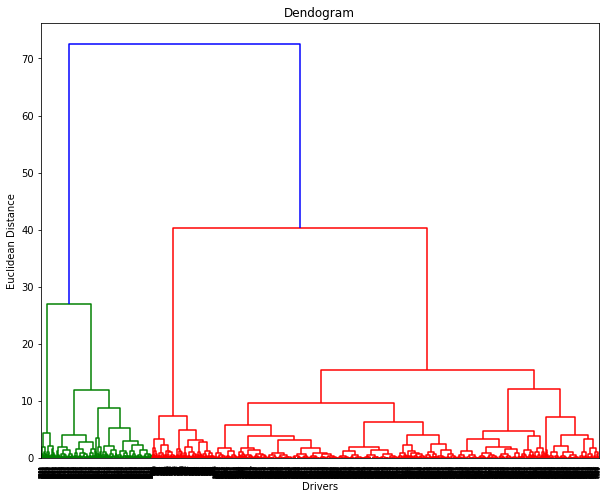

In [26]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,8))

endrogram_obj = dendrogram(linkage(data, method='ward', metric='euclidean'))

# Visualizing the Dendogram
plt.title('Dendogram')
plt.xlabel('Drivers')
plt.ylabel('Euclidean Distance')
plt.show()



In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df)
X_copy2 = df.copy()
X_copy2['Predicted Cluster'] = y_hc
X_copy2['Predicted Cluster'].value_counts()

1    3200
0     800
Name: Predicted Cluster, dtype: int64

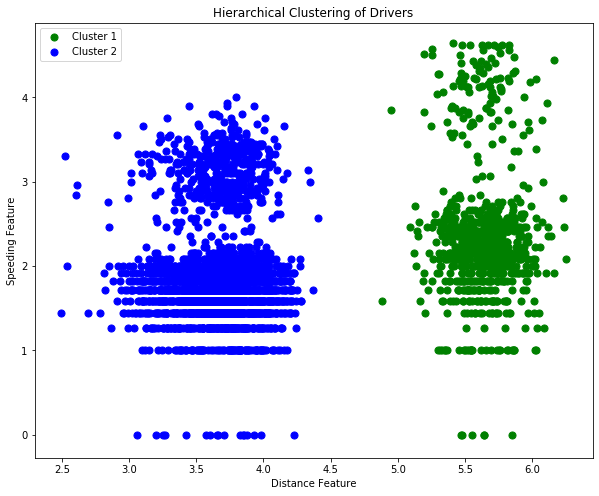

In [28]:
plt.figure(figsize=(10,8))

plt.scatter(data[y_hc == 0]['Distance_Feature'], data[y_hc == 0]['Speeding_Feature'], s=50, c='green', label='Cluster 1')
plt.scatter(data[y_hc == 1]['Distance_Feature'], data[y_hc == 1]['Speeding_Feature'], s=50, c='blue', label='Cluster 2')

plt.title('Hierarchical Clustering of Drivers')
plt.xlabel('Distance Feature')
plt.ylabel('Speeding Feature')
plt.legend(loc='upper left')
plt.show()

In [29]:
silhouette_avg12 = silhouette_score(data,y_hc).round(3)
print("For n_clusters =",2,
          "The average silhouette_score is :", silhouette_avg12)

For n_clusters = 2 The average silhouette_score is : 0.665


# 3) best model

In [30]:
Best_Model =pd.DataFrame({'Model':['kmeans','Agglomerative'],
             'score':[silhouette_avg,silhouette_avg12]})
             
Best_Model_df = Best_Model.sort_values(by='score', ascending=False)
Best_Model_df = Best_Model_df.set_index('Model')
Best_Model_df

,score
Model,
kmeans,0.665
Agglomerative,0.665


# 2) In comapany_stocks.csvPreview the document, you are given the historical stock price movement for 39 companies. This stock price movement is defined as the difference in dollar amount between the closing and opening prices for each trading day. The data was originally collected from Yahoo Finance for 2010 to 2015 duration. Each column represents a trading day and each row represents a company. Refer to the header and index for details about the trading day and companies.

# Apply any of the clustering methods that you have learned to partition companies into clusters. What insights can you gather from these clusters? Document your work and explain your reasoning.

## we shall solve this in the following manner
## 1) eda and data engineering
## 2) model building
## 3) best model



# 1) eda and data engineering

In [31]:
df1 = pd.read_csv('company_stocks.csv')
df1.head()

,Unnamed: 0,04-01-2010,05-01-2010,06-01-2010,07-01-2010,08-01-2010,11-01-2010,12-01-2010,13-01-2010,14-01-2010,...,16-10-2013,17-10-2013,18-10-2013,21-10-2013,22-10-2013,23-10-2013,24-10-2013,25-10-2013,28-10-2013,29-10-2013
0,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
1,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
2,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
3,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
4,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001


In [32]:
x=df1.iloc[:,0].tolist()
x

['AIG',
 'American express',
 'Boeing',
 'Bank of America',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'Cisco',
 'Dell',
 'Ford',
 'General Electrics',
 'Home Depot',
 'Honda',
 'HP',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Coca Cola',
 'Lookheed Martin',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Sony',
 'Symantec',
 'Toyota',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Columns: 964 entries, Unnamed: 0 to 29-10-2013
dtypes: float64(963), object(1)
memory usage: 293.8+ KB


In [34]:
df1.describe()

,04-01-2010,05-01-2010,06-01-2010,07-01-2010,08-01-2010,11-01-2010,12-01-2010,13-01-2010,14-01-2010,15-01-2010,...,16-10-2013,17-10-2013,18-10-2013,21-10-2013,22-10-2013,23-10-2013,24-10-2013,25-10-2013,28-10-2013,29-10-2013
count,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.284615,0.174102,0.101539,0.163590,2.353852e-01,0.030513,0.048205,0.205384,0.177692,-0.351025,...,0.393564,0.643590,0.058973,-0.147948,0.159617,0.000898,0.060512,0.189999,0.217949,0.235128
std,0.370532,0.514038,0.418597,0.620392,4.266385e-01,0.654606,0.489983,0.283816,0.356278,0.334961,...,0.496870,0.636630,0.328320,0.672732,0.572238,0.665883,0.441093,0.575902,0.476822,0.330159
min,-0.640002,-0.650002,-0.750000,-1.759994,-4.300000e-01,-1.080002,-1.130001,-0.330002,-0.520001,-1.330002,...,-0.810002,-0.139999,-0.710007,-3.599991,-1.819992,-0.870003,-0.870003,-0.550003,-0.630005,-0.190002
25%,0.060000,-0.094999,-0.104999,-0.115001,1.000000e-06,-0.280001,-0.150001,0.020001,-0.044998,-0.590000,...,0.055001,0.269999,-0.050000,-0.244997,-0.065000,-0.279998,-0.175000,-0.114998,-0.090002,-0.025000
50%,0.300000,0.070000,0.000000,0.070000,7.999800e-02,-0.030000,0.039997,0.190001,0.139999,-0.330002,...,0.299999,0.419998,0.020000,-0.010000,0.099999,-0.090000,0.020000,0.000000,0.040001,0.159996
75%,0.474998,0.485001,0.255001,0.255000,3.400000e-01,0.139999,0.229998,0.405000,0.370000,-0.135001,...,0.750001,0.904999,0.199997,0.050002,0.465004,0.055002,0.244999,0.230001,0.415001,0.410000
max,1.059997,1.770000,1.549999,2.690003,1.300003e+00,3.179996,1.050003,0.719993,1.410003,0.520001,...,1.559997,2.480003,1.029998,0.889999,1.290001,3.020004,1.360001,1.940002,1.250000,1.050003


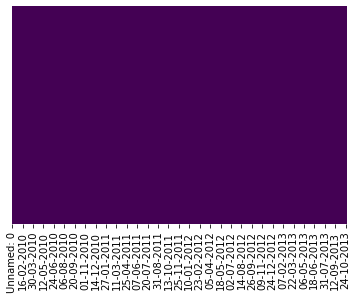

In [35]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

if we look more the data more closely we can tell that the data has already been normalized.The data represents the noramlized version of the movement of each stsocks.

In [36]:
movements=np.array(df1.iloc[:,1:])
movements


array([[-0.640002, -0.65    , -0.210001, ..., -0.040001, -0.400002,
         0.66    ],
       [ 0.109997,  0.      ,  0.260002, ...,  1.849999,  0.040001,
         0.540001],
       [ 0.459999,  1.77    ,  1.549999, ...,  1.940002,  1.130005,
         0.309998],
       ...,
       [ 0.430001,  0.229996,  0.57    , ..., -0.260002,  0.400001,
         0.480003],
       [ 0.09    ,  0.01    , -0.08    , ..., -0.03    ,  0.02    ,
        -0.03    ],
       [ 0.159999,  0.010001,  0.      , ..., -0.060001,  0.259998,
         0.099998]])

we can see that the all the stocks with +ve movement sums tells us that the stock is ginh in the upward trend. stocks with - movement sums show a downward trend

In [37]:
for i in range(0,len(x)):
    print('Company {} ; Change {}'.format(x[i],sum(movements[i][:])))

Company AIG ; Change -15.670027000000008
Company American express ; Change 42.57005699999998
Company Boeing ; Change 37.300188999999996
Company Bank of America ; Change -18.699995000000026
Company Canon ; Change 12.229904999999974
Company Caterpillar ; Change -24.65980900000002
Company Colgate-Palmolive ; Change 76.34007799999988
Company Cisco ; Change -0.43002600000000546
Company Dell ; Change 7.910499999999996
Company Ford ; Change -9.960003000000004
Company General Electrics ; Change -1.0199740000000013
Company Home Depot ; Change 39.71994399999993
Company Honda ; Change 21.919995000000007
Company HP ; Change 3.5300010000000044
Company Intel ; Change 6.739982000000002
Company Johnson & Johnson ; Change 25.23993300000002
Company JPMorgan Chase ; Change 0.11991599999999546
Company Coca Cola ; Change 12.370033000000003
Company Lookheed Martin ; Change 49.60007
Company McDonalds ; Change 12.519948000000005
Company 3M ; Change 43.56001
Company Microsoft ; Change 6.940044000000006
Company

vizualizing the trends of 2 stocks american express and AIG

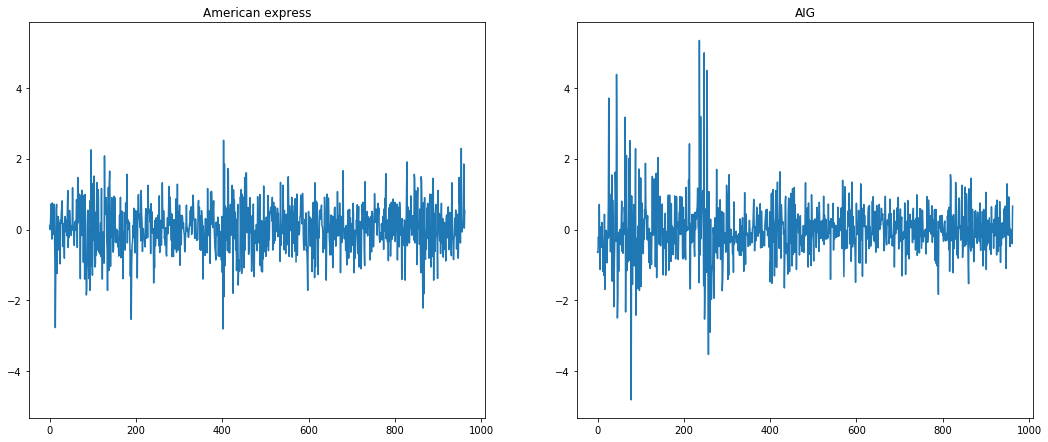

In [38]:
plt.clf
plt.figure(figsize=(18,16))
axl=plt.subplot(221)
plt.plot(movements[1][:])
plt.title(x[1])

plt.subplot(222,sharey=axl)
plt.plot(movements[0][:])
plt.title(x[0])
plt.show()

# 2) model building
## 2.1) using kmeans clustering

 finding the best k i.e. number of clusters, Using elbow method

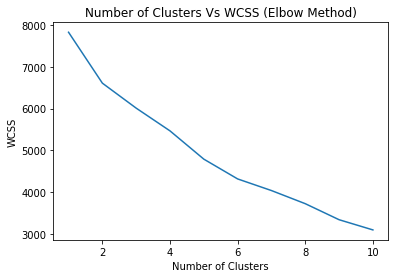

In [39]:
wcss1 = list()


for k1 in range(1,11):
    kmeans1 = KMeans(n_clusters=k1, init='k-means++', n_init=10, max_iter=300, random_state=0)
    y_kmeans = kmeans1.fit_predict(movements)
    wcss1.append(kmeans1.inertia_)

plt.plot(range(1,11), wcss1)
plt.title('Number of Clusters Vs WCSS (Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
wcss1

[7827.382259981206,
 6607.632397533122,
 6008.83566987676,
 5463.754278133971,
 4786.588324473698,
 4312.441545197368,
 4033.9508481427965,
 3719.2505791245567,
 3335.0486647200246,
 3090.693325140126]

In [41]:
from sklearn.cluster import KMeans
kmeans1=KMeans(n_clusters=4,max_iter=1000)
kmeans1=kmeans1.fit(movements)

In [42]:
labels=kmeans1.predict(movements)
dff=pd.DataFrame({'Companies':x,'Labels':labels})

print(dff.sort_values('Labels'))

            Companies  Labels
19          McDonalds       0
35           Wal-Mart       0
34        Wells Fargo       0
33           Walgreen       0
32      Valero Energy       0
31           Unilever       0
30  Texas instruments       0
28           Symantec       0
27               Sony       0
26     Procter Gamble       0
25             Pfizer       0
24              Pepsi       0
22         Mitsubishi       0
21          Microsoft       0
37              Xerox       0
17          Coca Cola       0
38              Yahoo       0
15  Johnson & Johnson       0
3     Bank of America       0
4               Canon       0
6   Colgate-Palmolive       0
7               Cisco       0
9                Ford       0
10  General Electrics       0
8                Dell       0
12              Honda       0
13                 HP       0
14              Intel       0
11         Home Depot       0
16     JPMorgan Chase       1
29             Toyota       1
20                 3M       1
18    Look

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in machine learning for predictive models.

In [43]:
from sklearn.decomposition import PCA

reduced_data=PCA(n_components=2).fit_transform(movements)

kmeans2=KMeans(n_clusters=4,max_iter=1000)
kmeans2.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
labels1=kmeans2.predict(reduced_data)
dff1=pd.DataFrame({'Companies':x,'Labels':labels1})

print(dff1.sort_values('Labels'))

            Companies  Labels
19          McDonalds       0
26     Procter Gamble       0
17          Coca Cola       0
16     JPMorgan Chase       0
15  Johnson & Johnson       0
29             Toyota       0
11         Home Depot       0
33           Walgreen       0
24              Pepsi       0
6   Colgate-Palmolive       0
35           Wal-Mart       0
36              Exxon       0
1    American express       0
23           Navistar       1
5         Caterpillar       1
2              Boeing       2
18    Lookheed Martin       2
20                 3M       2
32      Valero Energy       3
31           Unilever       3
28           Symantec       3
27               Sony       3
25             Pfizer       3
34        Wells Fargo       3
30  Texas instruments       3
0                 AIG       3
21          Microsoft       3
37              Xerox       3
14              Intel       3
13                 HP       3
12              Honda       3
10  General Electrics       3
9         

vizualizing the stock clusters

<Figure size 432x288 with 0 Axes>

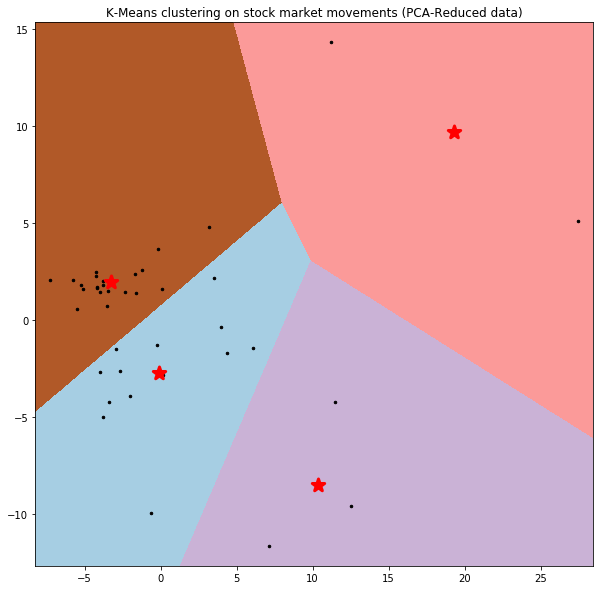

In [45]:
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans2.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation ='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],
         'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans2.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = '*',s = 169,linewidths = 3,color = 'r',zorder = 4)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

In [46]:
silhouette_avgpc = silhouette_score(reduced_data,labels1).round(3)
print("For n_clusters =",4,
          "The average silhouette_score is :", silhouette_avgpc)

For n_clusters = 4 The average silhouette_score is : 0.417


## 2.2) using agglomerative clustering

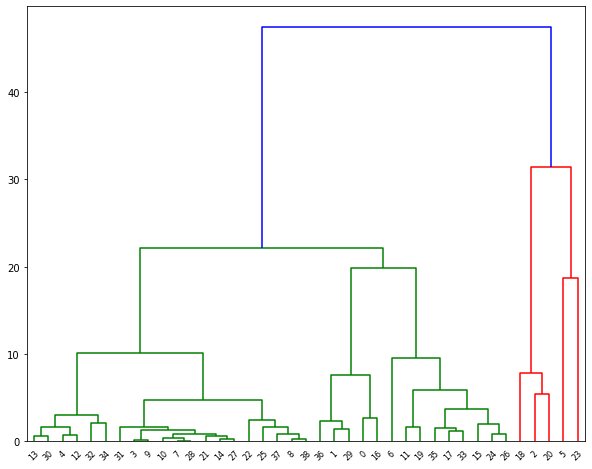

In [47]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10,8))

endrogram_obj = dendrogram(linkage(reduced_data, method='ward', metric='euclidean'))

In [48]:
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc1 = hc1.fit_predict(reduced_data)

hc1=pd.DataFrame({'Companies':x,'Labels':y_hc1})

print(hc1.sort_values('Labels'))

            Companies  Labels
0                 AIG       0
36              Exxon       0
35           Wal-Mart       0
33           Walgreen       0
29             Toyota       0
26     Procter Gamble       0
24              Pepsi       0
17          Coca Cola       0
16     JPMorgan Chase       0
15  Johnson & Johnson       0
11         Home Depot       0
19          McDonalds       0
1    American express       0
6   Colgate-Palmolive       0
23           Navistar       1
5         Caterpillar       1
2              Boeing       2
18    Lookheed Martin       2
20                 3M       2
12              Honda       3
34        Wells Fargo       3
3     Bank of America       3
32      Valero Energy       3
31           Unilever       3
30  Texas instruments       3
4               Canon       3
28           Symantec       3
25             Pfizer       3
10  General Electrics       3
22         Mitsubishi       3
21          Microsoft       3
37              Xerox       3
7         

In [49]:
silhouette_avghh = silhouette_score(reduced_data,y_hc1).round(3)
print("For n_clusters =",4,
          "The average silhouette_score is :", silhouette_avghh)

For n_clusters = 4 The average silhouette_score is : 0.411


# 3) best model

In [50]:
Best_Model1 =pd.DataFrame({'Model':['kmeans','Agglomerative'],
             'score':[silhouette_avgpc,silhouette_avghh]})
             
Best_Model_df1 = Best_Model1.sort_values(by='score', ascending=False)
Best_Model_df1 = Best_Model_df1.set_index('Model')
Best_Model_df1

,score
Model,
kmeans,0.417
Agglomerative,0.411
